In [39]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt

## Import Yelp Data

In [2]:
local = False

In [6]:
data_path = "../yelp_dataset/yelp_academic_dataset_"

business_fname = data_path + 'business.json'
# checkin_fname = data_path + 'checkin.json'
# photo_fname = data_path + 'photo.json'
if local:
    review_fname = data_path + 'review_short.json'
else:
    review_fname = data_path + 'review.json'
# tip_fname = data_path + 'tip.json'
# user_fname = data_path + 'user.json'

biz_df = pd.read_json(business_fname, lines=True)
print("business json attributes: ", list(biz_df.columns.values))

# ci_df = pd.read_json(checkin_fname, lines=True)
# print("checkin json attributes: ", list(ci_df.columns.values))

# ph_df = pd.read_json(photo_fname, lines=True)
# print("photo json attributes: ", list(ph_df.columns.values))

rev_df = pd.read_json(review_fname, lines=True)
print("review json attributes: ", list(rev_df.columns.values))

# tip_df = pd.read_json(tip_fname, lines=True)
# print("tip json attributes: ", list(tip_df.columns.values))

# use_df = pd.read_json(user_fname, lines=True)
# print("user json attributes: ", list(use_df.columns.values))

business json attributes:  ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
review json attributes:  ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


## Find Number of Empty Entries

In [7]:
print("business empty entries: ", biz_df.isna().sum(axis=0))
print("review empty entries: ", rev_df.isna().sum(axis=0))

# print("checkin empty entries: ", ci_df.isna().sum(axis=0))
# print("photo empty entries: ", ph_df.isna().sum(axis=0))
# print("tip empty entries: ", tip_df.isna().sum(axis=0))
# print("user empty entries: ", use_df.isna().sum(axis=0))

business empty entries:  business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64
review empty entries:  review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


## Sizes

In [8]:
print("business size: ", biz_df.shape)
print("review size: ", rev_df.shape)

# print("checkin size: ", ci_df.shape)
# print("photo size: ", ph_df.shape)

# print("tip size: ", tip_df.shape)
# print("user size: ", use_df.shape)

business size:  (209393, 14)
review size:  (100, 9)


## Set If Restaurant

In [9]:
biz_df['is_restaurant'] = (biz_df.loc[:,'categories'].where(biz_df.loc[:,'categories']\
                                                                 .str.contains('Restaurant')).isna()==False)

In [10]:
print(biz_df.loc[biz_df.loc[:,'is_restaurant']==False,'categories'])

0         Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1         Health & Medical, Fitness & Instruction, Yoga,...
2                          Pets, Pet Services, Pet Groomers
3         Hardware Stores, Home Services, Building Suppl...
4         Home Services, Plumbing, Electricians, Handyma...
                                ...                        
209386    Contractors, Local Services, Appliances & Repa...
209387          Shopping, Fashion, Accessories, Shoe Stores
209389    Department Stores, Food, Mobile Phones, Fashio...
209391                     Pet Services, Pet Training, Pets
209392    Tax Services, Professional Services, Accountan...
Name: categories, Length: 145432, dtype: object


In [12]:
biz_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",False
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None,False
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None,False
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",False
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",False


In [13]:
rev_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,WGRnCaMf6uV3asVnGc_pfA,lKPUyA6DveoWk-3zFrHA9w,Cuk-snnYHmx6bnTgwXEOzQ,2,14,5,1,"Very friendly teachers and staff, but definite...",2012-08-23 01:32:38
1,a188QhKGCNPvLKNV1PNmPA,--UOvCH5qEgdNQ8lzR8QYQ,WmiQBcRXlCMWJ0QJpO1FIw,4,6,1,4,They focus on drinks and desserts containing m...,2019-11-01 16:32:35
2,n_ZcSVfiKlWLrfmG41s65A,tzvSwlqFkBsZms7LGmzL4Q,Ssa6XY_RdDRRB9wuVIeIWw,5,0,0,0,We live in downtown and love the food/service ...,2019-11-16 02:00:30
3,ZhUeFHPAjUbEKRnYO_pl_w,WS-GsWbN4ltzigWl01t8Xw,o_dWM_hlpgjjd7F15UPjZw,3,0,0,0,First let me say Lindys in Columbus is one of ...,2019-11-16 14:37:10
4,82HIy7Qx5drfB7QS7sXMVg,YlOaRF1YpOdvUtm4foQlaQ,umXvdus9LbC6oxtLdXelFQ,5,2,0,1,Amazing place to experience the art of dessert...,2019-11-05 06:13:05


### Business Categories

In [117]:
def plotDict(valuesDict, topK, fileName, title):
    labels = list(valuesDict.keys())[0:topK]
    values = list(valuesDict.values())[0:topK]

    fig, axes = plt.subplots()
    axes.pie(values,
            labels = labels,
            
            startangle=90)
    plt.figsize=(20, 20)
    plt.title(title)

    axes.axis('equal')
    plt.savefig(fileName)


In [113]:
import collections

Total Number of Categories : 1336
Total Number of Businesses : 209393


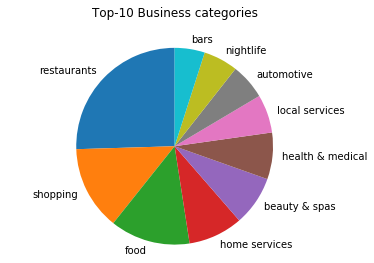

In [114]:
categoryCount = {}

for businessCategories in biz_df.categories:
    if businessCategories is None:
        continue
    for category in businessCategories.split(','):
        category = category.strip().lower()
        if category in categoryCount:
            categoryCount[category] = categoryCount[category] + 1
        else:
            categoryCount[category] = 1
            
print ("Total Number of Categories : " + str(len(categoryCount)))
print ("Total Number of Businesses : " + str(biz_df.shape[0]))
sortedCategoryCountsDict = collections.OrderedDict({k: v for k, v in sorted(categoryCount.items(), key=lambda item: item[1], reverse = True)})
plotDict(sortedCategoryCountsDict, 10, "top10_business_categories.png", "Top-10 Business categories\n")

### Most Reviewed Business Categories 

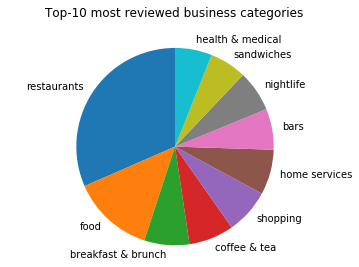

In [155]:
#Cross check this data against review count from business.json.

categoryToReviewCount = {}
for businessId, count in rev_df['business_id'].value_counts().iteritems():

    for categories in biz_df.loc[biz_df['business_id'] == businessId]['categories']:
        if categories is None:
            continue
        for category in categories.split(","):
            if category is None:
                continue
            category = category.strip().lower()
            if category in categoryToReviewCount:
                categoryToReviewCount[category]  = categoryToReviewCount[category] + count
            else:
                categoryToReviewCount[category] = count
sortedcategoryToReviewCount = collections.OrderedDict(
    {k: v for k, v in sorted(categoryToReviewCount.items(), key=lambda item: item[1], reverse = True)})

plotDict(sortedcategoryToReviewCount, 10, 
         "top10_business_by_reviews_categories.png", "Top-10 most reviewed business categories\n")


### Review Star Counting

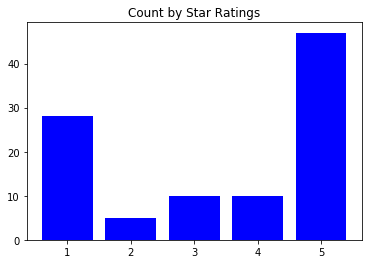

In [127]:
starCounts = {}
for stars, counts in rev_df['stars'].value_counts().iteritems():
    starCounts[stars] = counts

plt.bar(starCounts.keys(), starCounts.values(), color='b')
plt.title("Count by Star Ratings")
plt.savefig("starCount.png")

### Review Length Bins

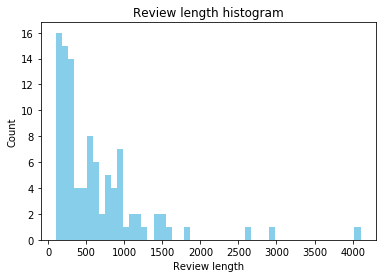

In [145]:
plt.hist(rev_df['text'].str.len(), bins = 50, color = "skyblue")
plt.xlabel("Review length")
plt.ylabel("Count")
plt.title("Review length histogram")
plt.savefig("review_length_bins.png")

### Missing Review Data

In [154]:
print("Missing Review data\n")
print(rev_df.isna().sum())
print("\n\nMissing Business data\n")
print(biz_df.isna().sum())


Missing Review data

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


Missing Business data

business_id          0
name                 0
address              0
city                 0
state                0
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       29045
categories         524
hours            44843
is_restaurant        0
dtype: int64


## Summarize statistics

In [7]:
# stats_index = ['Mean', 'Median', '1Q', '3Q', 'Std', 'Min', 'Max']

# biz_cols = ['review_count', 'stars']
# rev_cols = ['cool', 'funny', 'stars', 'useful']
# use_cols =  ['average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'fans', 'funny', 'review_count', 'useful']

# biz_stats = pd.DataFrame(index = stats_index, columns = biz_cols)
# rev_stats = pd.DataFrame(index = stats_index, columns = rev_cols)
# use_stats = pd.DataFrame(index = stats_index, columns = use_cols)

# stats = [biz_stats, rev_stats, use_stats]
# dfs = [biz_df, rev_df, use_df]

# for i, stat in enumerate(stats):
#     temp = dfs[i]
#     for col in tqdm.tqdm_notebook(list(stat.columns.values)):
#         print(col)
#         stat.loc['Mean',col] = temp.loc[:,col].mean()
#         # stat.loc['Mode',col] = temp.loc[:,col].mode(dropna=True)
#         stat.loc['Median',col] = temp.loc[:,col].median()        
#         stat.loc['1Q',col] = temp.loc[:,col].quantile(q=0.25)
#         stat.loc['3Q',col] = temp.loc[:,col].quantile(q=0.75)
#         stat.loc['Std',col] = temp.loc[:,col].std()
#         stat.loc['Min',col] = temp.loc[:,col].min()
#         stat.loc['Max',col] = temp.loc[:,col].max()

review_count
stars



cool
funny
stars
useful



average_stars
compliment_cool
compliment_cute
compliment_funny
compliment_hot
compliment_list
compliment_more
compliment_note
compliment_photos
compliment_plain
compliment_profile
compliment_writer
cool
fans
funny
review_count
useful



In [8]:
# overview_cols = ['Number of Entries', 'Number of Incomplete', 'Number Attributes', 'Attributes']
# overview_inds = ['business', 'checkin', 'photo', 'review', 'tip', 'user']
# overview_dfs = [biz_df, ci_df, ph_df, rev_df, tip_df, use_df]

# overview = pd.DataFrame(index = overview_inds, columns = overview_cols)

# for i, df in enumerate(overview_dfs):
#     overview.iloc[i,0] = df.shape[0]
#     overview.iloc[i,1] = sum(df.isna().sum(axis=1)>0)
#     overview.iloc[i,2] = df.shape[1]
#     overview.iloc[i,3] = list(df.columns.values)

In [9]:
# biz_df.loc[:,'is_restaurant'].sum()

59387

In [10]:
# sum(biz_df.loc[biz_df.loc[:,'is_restaurant'],:].isna().sum(axis=1)>0)

15273

In [1]:
# rev_df.join(biz_df[('business_id','is_restaurant')],on='business_id',how='left')

NameError: name 'rev_df' is not defined

## Print Statistics

In [11]:
# save_path = r"C:\Users\Willi\Documents\NYU\2020 Spring\Big Data Science\Project\Data_files\Yelp Data Overview\\"

# overview_path = save_path + 'overview_stats.csv'
# biz_path = save_path + 'business_stats.csv'
# rev_path = save_path + 'review_stats.csv'
# use_path = save_path + 'user_stats.csv'

# stats_names = [biz_path, rev_path, use_path]

# overview.to_csv(overview_path)

# for i,stat in enumerate(stats):
#     stat.to_csv(stats_names[i])